## Transforming code into beautiful, idiomatic Python by Raymond Hettinger (2013)

[IPython YouTubeVideo doc](http://ipython.org/ipython-doc/3/api/generated/IPython.display.html?highlight=youtube#IPython.display.YouTubeVideo)

2016-12-13, 2016-12-24, 2016-12-25, 2016-12-26

### 1. Looping over a range of numbers

In [14]:
# not good
for i in [1, 2, 3]:
    print(i**2)

1
4
9


In [15]:
# better
for i in range(1, 4):
    print(i**2)

1
4
9


In [16]:
# in Python 3, range() is a generator
ra = range(1, 4)
ra.stop

4

### 2. Looping over a collection

In [18]:
colors = ['red', 'green', 'blue', 'yellow']

In [19]:
# not good
for i in range(len(colors)):
    print(colors[i])

red
green
blue
yellow


In [21]:
# better
for color in colors:
    print(color)

red
green
blue
yellow


### 3. Looping backwards

In [1]:
colors = ['red', 'green', 'blue', 'yellow']

In [8]:
# okay
for color in colors[-1::-1]:
    print(color)

yellow
blue
green
red


In [9]:
# better
# reversed() is a built-in function
for color in reversed(colors):
    print(color)

yellow
blue
green
red


### 4. Looping over a collection and indicies

In [1]:
colors = ['red', 'green', 'blue', 'yellow']

In [10]:
# not good
for i in range(len(colors)):
    print(i, ' --> ', colors[i])

0  -->  red
1  -->  green
2  -->  blue
3  -->  yellow


In [11]:
# better
for i, color in enumerate(colors):
    print(i, ' --> ', color)

0  -->  red
1  -->  green
2  -->  blue
3  -->  yellow


### 5. Looping over two collections

In [12]:
names = ['Wes', 'Linoff', 'Segaran']
colors = ['red', 'green', 'blue', 'yellow']

In [15]:
# not good
n = min(len(names), len(colors))
for i in range(n):
    print(names[i], ' -- ', colors[i])

Wes  --  red
Linoff  --  green
Segaran  --  blue


In [16]:
# better
# in Python 3, zip return an iterator, same as izip in Python 2
for name, color in zip(names, colors):
    print(name, ' -- ', color)

Wes  --  red
Linoff  --  green
Segaran  --  blue


### 6. Looping in sorted order

In [ ]:
colors = ['red', 'green', 'blue', 'yellow']

In [24]:
for color in sorted(colors):
    print(color)

blue
green
red
yellow


In [27]:
for color in sorted(colors, reverse=True):
    print(color)

yellow
red
green
blue


### 7. Custom sort order

In [3]:
colors = ['red', 'green', 'blue', 'yellow']
for color in sorted(colors, key=len):
    print(color)

red
blue
green
yellow


### 8. iter(callable, sentinel)

In [2]:
# iter?

In [26]:
from io import StringIO
fp = StringIO(
"""
line 1
line 2
""")

fp is an iterator, which is only used once.

In [24]:
fp.readlines()

['\n', 'line 1\n', 'line 2\n']

In [25]:
fp.readline()

''

In [27]:
for line in iter(fp.readline, ''):
    print(line)   



line 1

line 2



### 9. for ... else ...

In [6]:
target = 11
for i in range(12):
    if i == target:
        print('find ', i)
        break
else:
    print('in else, target {} not found'.format(target))

find  11


### 10. Dictionary Skills

In [7]:
names = ['a', 'b', 'c']
colors = ['red', 'blue', 'green']

dict(zip(names, colors))

{'a': 'red', 'b': 'blue', 'c': 'green'}

Counting with dictionaries.

#### defaultdict

In [8]:
colors = ['red', 'blue', 'green', 'red']
from collections import defaultdict
d = defaultdict(int)
for c in colors:
    d[c] += 1
d

defaultdict(int, {'blue': 1, 'green': 1, 'red': 2})

#### dictionary built-in setdefault

In [14]:
ds = {}
for c in colors:
    k = len(c)
    ds.setdefault(k, []).append(c)
ds

{3: ['red', 'red'], 4: ['blue'], 5: ['green']}

#### but you should use `defaultdict`

In [17]:
d = defaultdict(list)
for c in colors:
    d[len(c)].append(c)
d    

defaultdict(list, {3: ['red', 'red'], 4: ['blue'], 5: ['green']})

### ChainMap(command_line_args, os.environ, defaults)

### 11. Unpacking sequences

In [18]:
p = 'Raymond', 30, 'rm@gmail.com'

In [19]:
p[0], p[1], p[2]

('Raymond', 30, 'rm@gmail.com')

In [20]:
name, age, email = p

In [21]:
name, age, email

('Raymond', 30, 'rm@gmail.com')

### My test

In [26]:
vals = [[]]*3

In [27]:
a, b, c = vals

In [28]:
a, b, c

([], [], [])

In [30]:
a.append(2)
a

[2, 2]

In [31]:
vals

[[2, 2], [2, 2], [2, 2]]

### 12. Updating multiple state variables

In [35]:
def fibonacci(n):
    x, y = 0, 1
    for i in range(n):
        x, y = y, x+y
    return x

[fibonacci(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Simultaneous state updates.

```python
x, y, dx, dy = (x + dx * t, 
                y + dy * t,
                func(x, y, dx, dy, partial='x'),
                func(x, y, dx, dy, partial='y'))
```                

### 13. Concatenating strings

In [36]:
colors = ['red', 'blue', 'green']
', '.join(colors)

'red, blue, green'

### 14. Updating sequences

#### bad

In [40]:
colors = ['red', 'blue', 'green']
del colors[0]

In [41]:
colors

['blue', 'green']

In [42]:
colors.pop(0)
colors

['green']

In [43]:
colors.insert(0, 'black')
colors

['black', 'green']

#### good

use better data structure `deque`, which is much faster than list

In [49]:
from collections import deque
colors = deque(['red', 'blue', 'green'])
colors

deque(['red', 'blue', 'green'])

In [50]:
del colors[0]
colors

deque(['blue', 'green'])

In [51]:
colors.popleft()
colors

deque(['green'])

In [52]:
colors.appendleft('black')
colors

deque(['black', 'green'])

### 15. Using decorators to factor-out administrative logic

```python
def web_lookup(url, saved={}):
    """here, saved default is set to mutable intentionally.
    `saved` stores the cached pages.
    """
    if url in saved:
        return saved[url]
    page = urllib.urlopen(url).read()
    saved[url] = page
    return page
```

A better way:

```python
from functools import wraps

def cache(func):
    saved = {}
    @wraps(func)
    def newfunc(*args):
        if args in saved:
            return newfunc(*args)
        result = func(*args)
        saved[args] = result
        return result
    return newfunc
    
@cache
def web_lookup(url):
    return urllib.urlopen(url).read()    
```    

### 16. Factor-out temporary contexts

In [60]:
from decimal import Decimal, getcontext, setcontext, localcontext, Context

In [59]:
# not good

old_context = getcontext().copy()
getcontext().prec = 50
print(Decimal(10) / Decimal(3))
setcontext(old_context)
print(Decimal(10) / Decimal(3))

3.3333333333333333333333333333333333333333333333333
3.333333333


In [61]:
# good

with localcontext(Context(prec=50)):
    print(Decimal(10) / Decimal(3))
print(Decimal(10) / Decimal(3))    

3.3333333333333333333333333333333333333333333333333
3.333333333


```python
with open('data.txt') as f:
    data = f.read()
```    

#### How to use locks

```python
with lock:
    pass
```    

```python
try:
    os.remove('somefile.tmp')
except OSError:
    pass
    
# a better way
with ignored(OSError):
    os.remove('somefile.tmp')
    
@contextmanager
def ignored(*exceptions):
    try:
        yield
    except exceptions:
        pass
```     

In [65]:
from contextlib import redirect_stdout

with open('help.txt', 'w') as f:
    with redirect_stdout(f):
        help(pow)
# a file 'help.txt' will be generated        

### 17. List comprehensions and generator expressions

In [81]:
n = 10000000

In [83]:
%%timeit
sum([i**2 for i in range(n)])

1 loop, best of 3: 4.99 s per loop


#### even a better way

In [82]:
%%timeit
sum(i**2 for i in range(n))

1 loop, best of 3: 4.94 s per loop


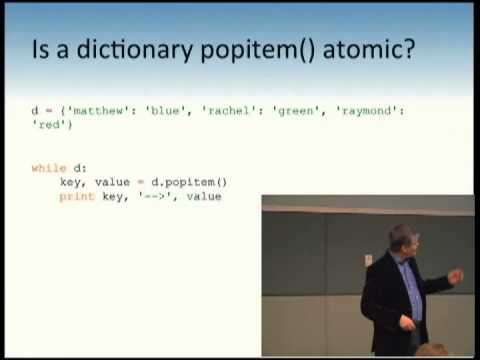

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('OSGv2VnC0go', height=500, width=600)